# 2020.05.23 머신러닝 알고리즘 스터디
# Gradient Boosting Tree
# 그래디언트 부스팅 결정 트리

## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## 1. 개요

### 1-1. Ensemble (앙상블) 이란?

- weak learner를 조합하여 strong learner를 만드는 것을 목표로 한다.
- 동일한 학습 알고리즘을 사용해서 여러 모델을 학습하는 개념.
- 성능이 좋지 않은 모델들을 모아서 성능이 좋은 모델 하나를 만드는 것이다.
- 현실에서 각각의 능력을 가진 팀원들이 모여서 개인으로서는 할 수 없는 일을 해내는 것이 앙상블이다.
- bagging 과 boosting 방법을 나뉜다.

![alt text](https://drive.google.com/uc?id=1bXBvLXMqrN6XrUp5FY2TYXK9Jtzu1jQU)

#### 1-1-1. Bagging (배깅)

- Bootstrap Aggregating의 줄임말.
- Bootstrap == Sample (샘플)
- Aggregating == 합산
- 복원 랜덤 샘플링 후 각 모델들을 학습시켜 결과를 집계 (Aggregating)하는 방법.
- 사용 이유: 알고리즘의 안전성과 정확성을 향상시키기 위해
- 일반적인 모델을 만드는 데 집중 가중치 부여하지 않음.
- 병렬적


![alt text](https://drive.google.com/uc?id=1RkaeSK7xl-5M1XEnRQOZcSw41lEQXQP2)

#### 학습순서
- (1) 대상 데이터로부터 복원 랜덤 샘플링
- (2) 추출한 데이터: 일종의 표본 집단
- (3) 동일한 모델을 학습.
- (4) 학습된 모델의 예측변수들을 집계하여 그 결과로 모델을 생성.
- (5) 샘플에서 나타난 결과를 일종의 중간값으로 맞추어 준다. -> overfitting 방지.
- Categorical Data: Voting 방식 집계
- Continuous Data: Average 방식 집계

#### 대표적인 알고리즘
- RandomForest

#### 1-1-2.Boosting (부스팅)

- 맞추기 어려운 문제를 맞추는 데 초점이 되어있음. 가중치를 부여함.
- 배깅과 마찬가지로 동일하게 복원 랜덤 샘플링.
- But, 가중치를 부여하여 오답에 대해 높은 가중치를 부여하고, 정답에 대해 낮은 가중치를 부여하기 때문에 오답에 더욱 집중할 수 있다.
- 순차적으로 학습.
- 정확도가 높게 나타나지만, 그만큼 Outlier에 취약하다.
- 직렬적

![alt text](https://drive.google.com/uc?id=10Ub4vfs8OuXrZF9D8ZDih4cDMlWS0aKU)

#### 대표적인 알고리즘
- AdaBoost
- XGBoost
- GradientBoost
- Gradinet Boosting Regressor

![alt text](https://drive.google.com/uc?id=1EORz94DfpLWaENGDzGFA67TmPpkXt5Gb)

#### ** Bagging 과 Boosting 의 차이

![alt text](https://drive.google.com/uc?id=1uVbQpYVXjNE5eCEgDTISnmGfDPOwASro)

![alt text](https://drive.google.com/uc?id=1kIGUnQyKBBiBqj6wB8Zp8n82pJuFKSx9)

학습 모델이 예측 오류는 크게 2개 (bias, variance) 오류.
- (1) 높은 Bias로 인한 Underfiitting 
- (2) 높은 Variance로 인한 Overfitting

#### (1) Bias
- 알고리즘의 bias 가 크다. -> 정확도가 기대치보다 떨어진다.
- Underfitting
- 이상적인 decision boundary 보다 지나치게 단순한 decision boundary 를 사용한 경우.
- 해결 방법: 네트워크 깊고 복잡하게, 최적화 방법을 다르게


#### (2) Variance
- Variance 가 크다. -> 학습 후, 새로운 데이터셋에 대해서는 그 결과가 매우 다르게 나오는 것을 이야기한다.
- Overfitting
- 이상적인 decision boundary 보다 지나치게 복잡한 decision boundary 를 사용한 경우.
- 해결 방법: 데이터 갯수를 증가, 네트워크 복잡도 증가.

![alt text](https://drive.google.com/uc?id=11-ZcX-Swqqt4quIxUToZKPLos8RJmarQ)

Bias 와 Variance 의 trade-off <br><br>
![alt text](https://drive.google.com/uc?id=1rgIYb9p2cXSu6yFErSC5DRntPnWkJ9TZ)

#### 1-1-3. Stacking (스태킹)
- Stacking 은 서로 다른 모델들을 조합해 최고의 성능을 내는 모델을 생성.
- 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델 (메타모델)로 재학습시켜 결과를 예측하는 방법.
- Two heads are better than one!
- SVM, Random Forest, KNN 등 다양한 알고리즘을 사용할 수 있다.
- 계산량이 너무 많다.

#### 1-1-4. Voting (보팅)
- 서로 다른 알고리즘을 가진 분류기를 결합하는 것.
- (1) 하드 보팅: 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정.
- (2) 소프트 보팅: 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정.

In [8]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
pd.set_option('display.expand_frame_repr', False)

# load the dataset
cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
#print(data_df.head(3))
 
 
"""
 mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  mean concavity  mean concave points  mean symmetry  mean fractal dimension  radius error  texture error  perimeter error  area error  smoothness error  compactness error  concavity error  concave points error  symmetry error  fractal dimension error  worst radius  worst texture  worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  worst concave points  worst symmetry  worst fractal dimension
0        17.99         10.38           122.8     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871        1.0950         0.9053            8.589      153.40          0.006399            0.04904          0.05373               0.01587         0.03003                 0.006193         25.38          17.33            184.6      2019.0            0.1622             0.6656           0.7119                0.2654          0.4601                  0.11890
1        20.57         17.77           132.9     1326.0          0.08474           0.07864          0.0869              0.07017         0.1812                 0.05667        0.5435         0.7339            3.398       74.08          0.005225            0.01308          0.01860               0.01340         0.01389                 0.003532         24.99          23.41            158.8      1956.0            0.1238             0.1866           0.2416                0.1860          0.2750                  0.08902
2        19.69         21.25           130.0     1203.0          0.10960           0.15990          0.1974              0.12790         0.2069                 0.05999        0.7456         0.7869            4.585       94.03          0.006150            0.04006          0.03832               0.02058         0.02250                 0.004571         23.57          25.53            152.5      1709.0            0.1444             0.4245           0.4504                0.2430          0.3613                  0.08758
 
"""
 
#개별모델
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)
 
#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'soft')
vo_clf2 = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)], voting = 'hard')

 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)
 
#VotingClassifier 학습/예측 평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting (soft) 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

#VotingClassifier 학습/예측 평가
vo_clf2.fit(X_train, y_train)
pred2 = vo_clf2.predict(X_test)
print('Voting (hard) 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred2)))
 
#개별모델 학습 평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers :
    classifier.fit(X_train, y_train)
    pred3 = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test,pred3)))
 

Voting (soft) 분류기 정확도 : 0.9474
Voting (hard) 분류기 정확도 : 0.9386
LogisticRegression 정확도 : 0.9386
KNeighborsClassifier 정확도 : 0.9386


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## 2. 학습과정

### Gradient Boosting Regressor

- 여러 결정 트리를 Gradient Boosting 방식으로 묶어 강력한 모델을 만드는 앙상블 기법.
- 회귀 (Regression), 분류 (Classification) 모두 사용.
- 얕은 트리를 간단한 모델(weak learner) 을 많이 연결하는 것이 그래디언트 부스팅

### Random Forest VS Gradient Boosting Regressor

| 개요 | RF | GB |
|------|-----|----|
| **학습** | 과대적합된 많은 트리 중 결과를 <br><br> 평균내어 과대적합된 양을 줄이기 | 이전 트리의 예측값과 타겟값 <br><br> 사이의 오차를 줄이는 방향
| **앙상블** | Bagging 방식 | Boosting 방식
| **메모리, 예측** | | 무작위성이 없는 대신 <br><br> 강력한 사전가지치기 사용 
| **장점** | 성능이 매우 뛰어남 <br><br> 매개변수 튜닝 없이도 잘 작동 <br><br> 데이터의 스케일을 맞추지 않아도 됨 (전처리X) <br><br> 매우 큰 데이터셋에서도 잘 작동  | 특성의 스케일 조정이 필요하지 않음 (전처리 X) <br><br> 이진특성, 연속적인 특성에서 잘 동작
| **단점** | 차원이 매우 높고, 희소한 데이터에서는 잘 작동하지 않음. <br><br> 많은 메모리 사용. <br><br> 훈련, 예측 시 오래걸림. | 매개변수를 잘 조정해야 함. <br><br> 훈련시간이 김. <br><br> 희소한 고차원 데이터에는 잘 작동하지 않음.
| **중요 매개변수** | n_estimators: 트리 갯수 지정 <br><br> max_features: 사용할 특성 수 <br><br> n_kob: 사용할 코어 수 지정 가능 <br><br> random_state: 같은 결과를 만들기 위해 고정 | n_estimators: 트리 갯수 지정 <br><br> learning_rate: 오차 보정률 <br><br> max_depth: 최대 트리 깊이 <br><br> max_leaf_nodes: 리프노드의 최대갯수

어떨 때 사용할까?

- RF 는 높은 성능을 내고자 할 때 사용.
- 안정적인 RF를 먼저 사용.
- RF 가 잘 되더라도 예측 시간이 중요하거나, 모델 성능을 쥐어짜야 할 경우 그래디언트 부스팅 사용.

Random Forest <br>

In [12]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=4cc5f3c6c90ad574be189d6bfd3567a5fd8c84d9729a494eed60511f34415fbc
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


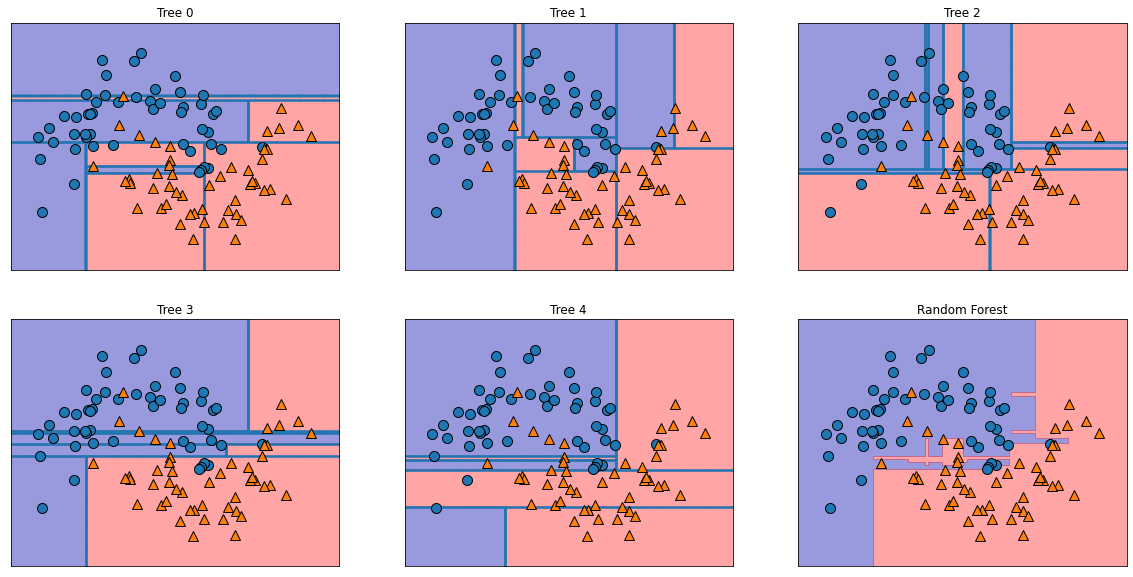

In [13]:
# two_moon데이터셋으로 트리 5개로 구성된 랜덤 포레스트 모델을 만들음

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)


# 랜덤 포레스트 안에 만들어진 트리는 estimator_속성에 저장
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

# 각 트리에서 학습된 결정 경계와 이를 취합해 만든 결정 경계를 함께 시각화

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [14]:
# 유방암 데이터셋에 100개 트리로 이뤄진 랜덤 포레스트 

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)  # 100개 트리
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


Gradient Boosting Regressor <br>

In [15]:
# 유방암 데이터 셋을 이용해 그래디언트 부스팅 실시 
## 기본값인 깊이 3, 트리수 100, 학습률 0.1 사용

from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965


## 3. 특징과 장단점

### 장점

- Tabular format 데이터 (엑셀형태와 같이 X-Y Grid로 되어있는 데이터) 에 대한 예측에서 엄청난 성능을 보임.
- 머신러닝 알고리즘 중에서도 가장 예측 성능이 높다고 알려진 알고리즘.

### 단점

- 계산량이 많기 때문에, 하드웨어를 효율적으로 구현하는 것이 필요하다.

### 대표 패키지

- LightGBM
- CatBoost
- XGBoost

## Reference
- https://rosypark.tistory.com/55
- https://3months.tistory.com/368
- https://dambaekday.tistory.com/5
- https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2
- https://www.slideshare.net/freepsw/apache-kafka-metrics-123663954?next_slideshow=1
- https://ssoondata.tistory.com/14